In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('Train_df - Train_df.csv')
df.head(20)

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02-10-2015 9:00,02-10-2015,7639.32
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 10:00,02-10-2015,6300.32
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 11:00,02-10-2015,6621.42
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 12:00,02-10-2015,6958.12
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 13:00,02-10-2015,6824.22
5,NaN,292.72,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 14:00,02-10-2015,7164.82
6,NaN,293.37,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 15:00,02-10-2015,7680.92
7,NaN,294.16,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 16:00,02-10-2015,8250.32
8,NaN,294.84,0.0,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 17:00,02-10-2015,7952.62
9,NaN,293.70,0.0,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 18:00,02-10-2015,6622.72


In [3]:
# Create a dataset from the date column values starting from 11-06-2018 to 16-07-2020
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Create a mask that includes the date range
mask1 = (df['Date'] >= '2018-06-11') & (df['Date'] <= '2020-07-16')

# Filter the dataframe
df = df.loc[mask1]

# Process holiday information
# Filter the rows where Holiday is 1
holiday_dates = df[df['Holiday'] == 1]['Date'].unique()

# Print all the dates where Holiday is 1
print("Holiday dates:")
print(holiday_dates)
print(f"Number of unique holiday dates: {len(holiday_dates)}")

# Update the 'Holiday' column to 1 for all rows where the 'Date' is in the holiday_dates list
df.loc[df['Date'].isin(holiday_dates), 'Holiday'] = 1

# Set 'Holiday' to 0 for all rows where 'Holiday' is not 1
df.loc[df['Holiday'] != 1, 'Holiday'] = 0

# Verify holiday information
Holiday = df[df['Holiday'] == 1]
Not_Holiday = df[df['Holiday'] == 0]
print(f"Number of rows marked as holiday: {len(Holiday)}")
print(f"Number of rows not marked as holiday: {len(Not_Holiday)}")

# Save the processed dataset to a new csv file
df.to_csv('Train_df_18-20.csv', index=False)

print(f"Dataset saved with {len(df)} rows.")
print("First 20 rows of the processed dataset:")
df.head(20)

Holiday dates:
<DatetimeArray>
['2018-07-03 00:00:00', '2018-08-27 00:00:00', '2018-09-07 00:00:00',
 '2018-10-12 00:00:00', '2018-11-11 00:00:00', '2018-11-26 00:00:00',
 '2018-12-25 00:00:00', '2019-01-01 00:00:00', '2019-02-15 00:00:00',
 '2019-05-30 00:00:00', '2019-07-04 00:00:00', '2019-08-25 00:00:00',
 '2019-09-05 00:00:00', '2019-10-10 00:00:00', '2019-11-11 00:00:00',
 '2019-11-24 00:00:00', '2019-12-26 00:00:00', '2020-01-02 00:00:00',
 '2020-01-16 00:00:00', '2020-02-20 00:00:00', '2020-05-29 00:00:00',
 '2020-07-04 00:00:00']
Length: 22, dtype: datetime64[ns]
Number of unique holiday dates: 22
Number of rows marked as holiday: 483
Number of rows not marked as holiday: 15619
Dataset saved with 16102 rows.
First 20 rows of the processed dataset:


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
13898,0.0,288.086,0.0,0.0,92,Rainfall,Soft rain,11-06-2018 20:00,2018-06-11,4172.22
13899,0.0,298.043,0.0,0.0,0,Clear skies,Clear skies,12-06-2018 18:00,2018-06-12,6123.52
13900,0.0,292.961,0.0,0.0,8,Clear skies,Clear skies,12-06-2018 20:00,2018-06-12,4450.42
13901,0.0,292.361,0.0,0.0,9,Clear skies,Clear skies,12-06-2018 21:00,2018-06-12,4707.82
13902,0.0,295.340,0.0,0.0,76,Cloudy skies,Fragmented clouds,13-06-2018 21:00,2018-06-13,4380.22
13903,0.0,293.437,0.0,0.0,56,Cloudy skies,Fragmented clouds,13-06-2018 23:00,2018-06-13,3090.62
13904,0.0,296.164,0.0,0.0,89,Rainfall,Soft rain,14-06-2018 20:00,2018-06-14,4200.82
13905,0.0,300.007,0.0,0.0,0,Clear skies,Clear skies,19-06-2018 18:00,2018-06-19,6505.72
13906,0.0,296.269,0.0,0.0,88,Rainfall,Soft rain,20-06-2018 18:00,2018-06-20,5681.52
13907,0.0,294.514,0.0,0.0,12,Cloudy skies,Scattered clouds,22-06-2018 00:00,2018-06-22,1387.62


In [6]:
# Create a dataset from the date column values starting from 11-06-2018 to 16-07-2020 and 02-10-2015 to 08-08-2017
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Create a mask that includes both date ranges
mask2 = (df['Date'] >= '2015-10-02') & (df['Date'] <= '2017-08-08')

# Filter the dataframe
df = df.loc[mask2]

# Process holiday information
# Filter the rows where Holiday is 1
holiday_dates = df[df['Holiday'] == 1]['Date'].unique()

# Print all the dates where Holiday is 1
print("Holiday dates:")
print(holiday_dates)
print(f"Number of unique holiday dates: {len(holiday_dates)}")

# Update the 'Holiday' column to 1 for all rows where the 'Date' is in the holiday_dates list
df.loc[df['Date'].isin(holiday_dates), 'Holiday'] = 1

# Set 'Holiday' to 0 for all rows where 'Holiday' is not 1
df.loc[df['Holiday'] != 1, 'Holiday'] = 0

# Verify holiday information
Holiday = df[df['Holiday'] == 1]
Not_Holiday = df[df['Holiday'] == 0]
print(f"Number of rows marked as holiday: {len(Holiday)}")
print(f"Number of rows not marked as holiday: {len(Not_Holiday)}")

# Save the dataset to a new csv file
df.to_csv('Train_df_15-17.csv', index=False)

df.head(20)

Holiday dates:
<DatetimeArray>
['2015-10-08 00:00:00', '2015-11-12 00:00:00', '2015-11-22 00:00:00',
 '2015-12-25 00:00:00', '2016-01-01 00:00:00', '2016-02-18 00:00:00',
 '2016-05-27 00:00:00', '2016-07-04 00:00:00', '2016-08-22 00:00:00',
 '2016-09-02 00:00:00', '2016-10-14 00:00:00', '2016-11-11 00:00:00',
 '2016-11-28 00:00:00', '2016-12-25 00:00:00', '2017-01-01 00:00:00',
 '2017-01-20 00:00:00', '2017-02-17 00:00:00', '2017-05-26 00:00:00']
Length: 18, dtype: datetime64[ns]
Number of unique holiday dates: 18
Number of rows marked as holiday: 409
Number of rows not marked as holiday: 13489


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02-10-2015 9:00,2015-10-02,7639.32
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 10:00,2015-10-02,6300.32
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 11:00,2015-10-02,6621.42
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 12:00,2015-10-02,6958.12
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 13:00,2015-10-02,6824.22
5,0.0,292.72,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 14:00,2015-10-02,7164.82
6,0.0,293.37,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 15:00,2015-10-02,7680.92
7,0.0,294.16,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 16:00,2015-10-02,8250.32
8,0.0,294.84,0.0,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 17:00,2015-10-02,7952.62
9,0.0,293.70,0.0,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 18:00,2015-10-02,6622.72


In [8]:
# find the Range of traffic volume for the year 2018 to 2020 and 2015 to 2017
df1 = pd.read_csv('Train_df_18-20.csv')
df2 = pd.read_csv('Train_df_15-17.csv')

# Find the range of traffic volume for the year 2018 to 2020
range_18_20 = df1['Traffic_Vol'].max() - df1['Traffic_Vol'].min()
print('Range of traffic volume for the year 2018 to 2020:', range_18_20)

# Find the range of traffic volume for the year 2015 to 2017
range_15_17 = df2['Traffic_Vol'].max() - df2['Traffic_Vol'].min()
print('Range of traffic volume for the year 2015 to 2017:', range_15_17)

Range of traffic volume for the year 2018 to 2020: 9470.5
Range of traffic volume for the year 2015 to 2017: 9220.900000000001


Model Performance:
Mean Absolute Error: 228.31123553103885
Root Mean Squared Error: 431.4865914706215


C:\Users\MSIS\AppData\Local\Temp\ipykernel_2880\2211822313.py:97: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=last_date + timedelta(hours=1),


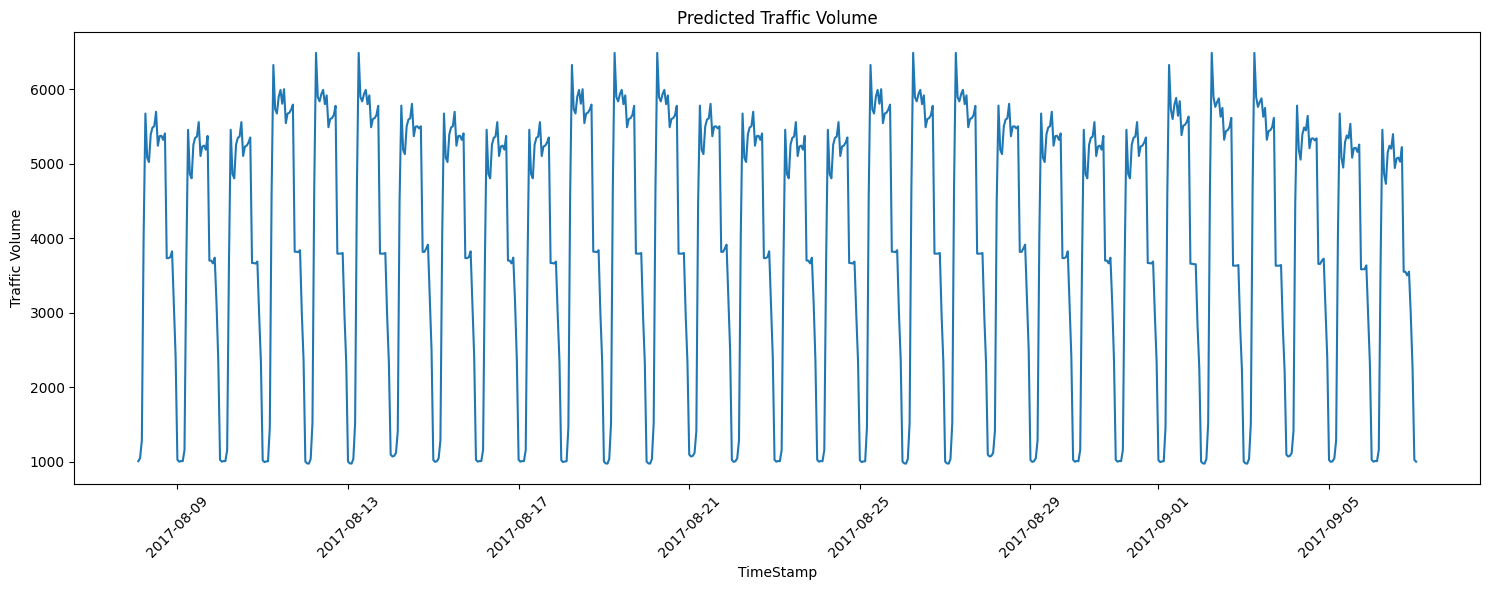

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from datetime import datetime, timedelta

# Data Preprocessing
class TrafficVolumeForecast:
    def __init__(self, data_path):
        # Load the data
        self.df = pd.read_csv(data_path)
        
        # Convert TimeStamp to datetime with dayfirst=True
        self.df['TimeStamp'] = pd.to_datetime(self.df['TimeStamp'], dayfirst=True)
        
        # Feature Engineering
        self.engineer_time_features()
        
        # Encode categorical variables
        self.encode_categorical_variables()
        
    def engineer_time_features(self):
        # Extract time-based features
        self.df['Hour'] = self.df['TimeStamp'].dt.hour
        self.df['Day_of_Week'] = self.df['TimeStamp'].dt.dayofweek
        self.df['Month'] = self.df['TimeStamp'].dt.month
        self.df['Is_Weekend'] = self.df['TimeStamp'].dt.dayofweek.isin([5,6]).astype(int)
        
        # Lag features for traffic volume
        self.df['Traffic_Volume_Lag1'] = self.df['Traffic_Vol'].shift(1)
        self.df['Traffic_Volume_Lag24'] = self.df['Traffic_Vol'].shift(24)
        
        # Rolling window features
        self.df['Traffic_Volume_Rolling_Mean_6'] = self.df['Traffic_Vol'].rolling(window=6).mean()
        self.df['Traffic_Volume_Rolling_Mean_24'] = self.df['Traffic_Vol'].rolling(window=24).mean()
        
        # Drop NaN values created by lag and rolling features
        self.df.dropna(inplace=True)
    
    def encode_categorical_variables(self):
        # Label Encoding for categorical variables
        le_weather = LabelEncoder()
        le_weather_desc = LabelEncoder()
        
        self.df['Weather_Encoded'] = le_weather.fit_transform(self.df['Weather'])
        self.df['Weather_Desc_Encoded'] = le_weather_desc.fit_transform(self.df['Weather_Desc'])
    
    def prepare_features_and_target(self):
        # Select features
        features = [
            'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover', 
            'Weather_Encoded', 'Weather_Desc_Encoded', 
            'Hour', 'Day_of_Week', 'Month', 'Is_Weekend',
            'Traffic_Volume_Lag1', 'Traffic_Volume_Lag24',
            'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24'
        ]
        
        X = self.df[features]
        y = self.df['Traffic_Vol']
        
        return train_test_split(X, y, test_size=0.2, shuffle=False)
    
    def train_xgboost_model(self, X_train, X_test, y_train, y_test):
        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # XGBoost Model
        model = xgb.XGBRegressor(
            n_estimators=100, 
            learning_rate=0.1, 
            random_state=42
        )
        
        model.fit(X_train_scaled, y_train)
        
        # Predictions
        y_pred = model.predict(X_test_scaled)
        
        # Evaluation
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print("Model Performance:")
        print(f"Mean Absolute Error: {mae}")
        print(f"Root Mean Squared Error: {rmse}")
        
        return model, scaler
    
    def forecast_future_traffic(self, model, scaler, forecast_period):
        # Create a dataframe for future forecasting
        last_date = self.df['TimeStamp'].max()
        future_dates = pd.date_range(start=last_date + timedelta(hours=1), 
                                    periods=forecast_period, 
                                    freq='H')
        
        future_df = pd.DataFrame({'TimeStamp': future_dates})
        
        # Add necessary engineered features for future dates
        future_df['Hour'] = future_df['TimeStamp'].dt.hour
        future_df['Day_of_Week'] = future_df['TimeStamp'].dt.dayofweek
        future_df['Month'] = future_df['TimeStamp'].dt.month
        future_df['Is_Weekend'] = future_df['TimeStamp'].dt.dayofweek.isin([5,6]).astype(int)
        
        # Placeholder for future weather and other conditions
        future_df['Temperature'] = self.df['Temperature'].mean()
        # Fix column names to match feature list
        future_df['Rainfall_last_hour'] = self.df['Rainfall_last_hour'].mean()
        future_df['Snowfall_last_hour'] = self.df['Snowfall_last_hour'].mean()
        future_df['Cloud_Cover'] = self.df['Cloud_Cover'].mean()
        future_df['Weather_Encoded'] = self.df['Weather_Encoded'].mode()[0]
        future_df['Weather_Desc_Encoded'] = self.df['Weather_Desc_Encoded'].mode()[0]
        
        # Use last known traffic volume for initial lag features
        last_traffic_volume = self.df['Traffic_Vol'].iloc[-1]
        
        # Safely get historical data - check if we have enough records
        data_length = len(self.df)
        if data_length >= 24:
            last_24h_traffic_volume = self.df['Traffic_Vol'].iloc[-24]
        else:
            # If we don't have 24 hours of data, use the earliest available
            last_24h_traffic_volume = self.df['Traffic_Vol'].iloc[0]
        
        future_df['Traffic_Volume_Lag1'] = last_traffic_volume
        future_df['Traffic_Volume_Lag24'] = last_24h_traffic_volume
        
        # Safely calculate rolling means
        rolling_window_6 = min(6, data_length)
        rolling_window_24 = min(24, data_length)
        
        future_df['Traffic_Volume_Rolling_Mean_6'] = self.df['Traffic_Vol'].tail(rolling_window_6).mean()
        future_df['Traffic_Volume_Rolling_Mean_24'] = self.df['Traffic_Vol'].tail(rolling_window_24).mean()
        
        # Prepare features for prediction
        features = [
            'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover', 
            'Weather_Encoded', 'Weather_Desc_Encoded', 
            'Hour', 'Day_of_Week', 'Month', 'Is_Weekend',
            'Traffic_Volume_Lag1', 'Traffic_Volume_Lag24',
            'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24'
        ]
        
        # Scale features
        future_features = future_df[features]
        future_features_scaled = scaler.transform(future_features)
        
        # Forecast
        future_predictions = model.predict(future_features_scaled)
        
        return pd.DataFrame({
            'TimeStamp': future_dates,
            'Predicted_Traffic_Volume': future_predictions
        })

# Usage Example
def main():
    # Assuming your data is in a CSV file
    forecast_model = TrafficVolumeForecast('Train_df_15-17.csv')
    
    # Prepare data
    X_train, X_test, y_train, y_test = forecast_model.prepare_features_and_target()
    
    # Train model
    model, scaler = forecast_model.train_xgboost_model(X_train, X_test, y_train, y_test)
    
    # Forecast future traffic (e.g., for 30 days)
    forecast_period = 30 * 24  # 30 days * 24 hours
    future_forecast = forecast_model.forecast_future_traffic(model, scaler, forecast_period)
    
    # Visualize forecast
    plt.figure(figsize=(15,6))
    plt.plot(future_forecast['TimeStamp'], future_forecast['Predicted_Traffic_Volume'])
    plt.title('Predicted Traffic Volume')
    plt.xlabel('TimeStamp')
    plt.ylabel('Traffic Volume')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Model Performance:
Mean Absolute Error: 215.46454567600836
Root Mean Squared Error: 330.5365406554092


C:\Users\MSIS\AppData\Local\Temp\ipykernel_2880\3564503737.py:97: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=last_date + timedelta(hours=1),


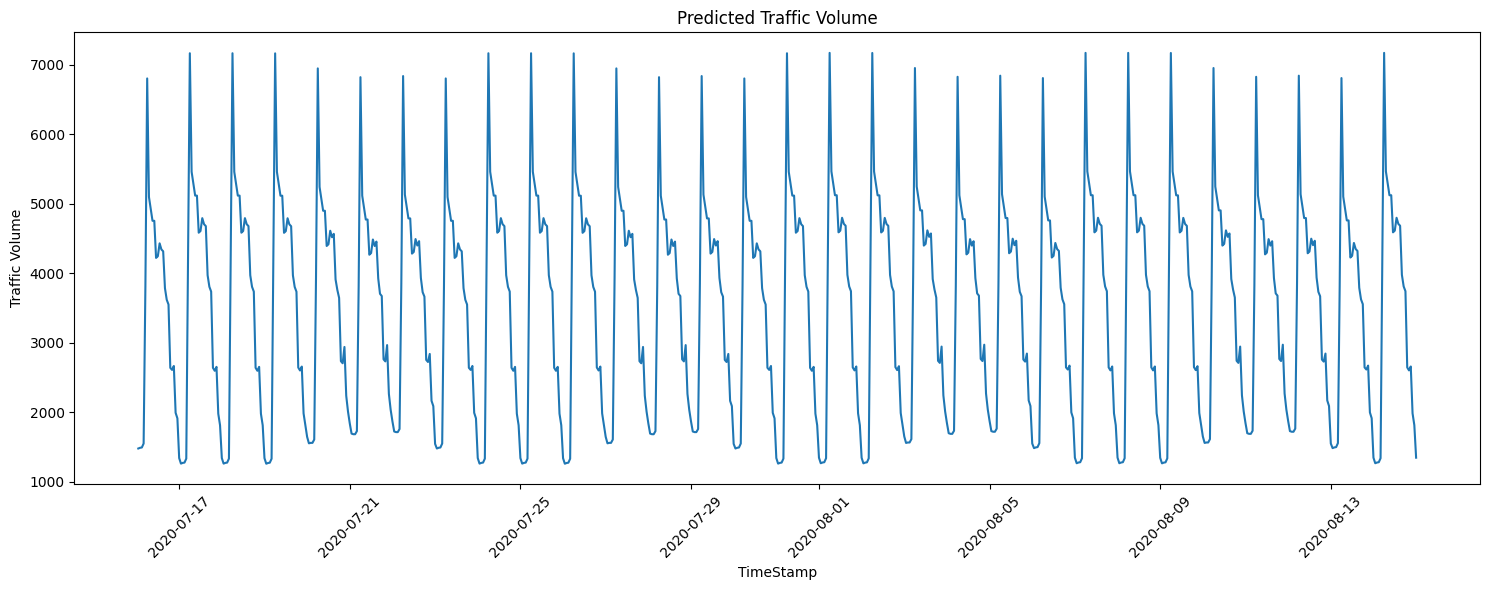

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from datetime import datetime, timedelta

# Data Preprocessing
class TrafficVolumeForecast:
    def __init__(self, data_path):
        # Load the data
        self.df = pd.read_csv(data_path)
        
        # Convert TimeStamp to datetime with dayfirst=True
        self.df['TimeStamp'] = pd.to_datetime(self.df['TimeStamp'], dayfirst=True)
        
        # Feature Engineering
        self.engineer_time_features()
        
        # Encode categorical variables
        self.encode_categorical_variables()
        
    def engineer_time_features(self):
        # Extract time-based features
        self.df['Hour'] = self.df['TimeStamp'].dt.hour
        self.df['Day_of_Week'] = self.df['TimeStamp'].dt.dayofweek
        self.df['Month'] = self.df['TimeStamp'].dt.month
        self.df['Is_Weekend'] = self.df['TimeStamp'].dt.dayofweek.isin([5,6]).astype(int)
        
        # Lag features for traffic volume
        self.df['Traffic_Volume_Lag1'] = self.df['Traffic_Vol'].shift(1)
        self.df['Traffic_Volume_Lag24'] = self.df['Traffic_Vol'].shift(24)
        
        # Rolling window features
        self.df['Traffic_Volume_Rolling_Mean_6'] = self.df['Traffic_Vol'].rolling(window=6).mean()
        self.df['Traffic_Volume_Rolling_Mean_24'] = self.df['Traffic_Vol'].rolling(window=24).mean()
        
        # Drop NaN values created by lag and rolling features
        self.df.dropna(inplace=True)
    
    def encode_categorical_variables(self):
        # Label Encoding for categorical variables
        le_weather = LabelEncoder()
        le_weather_desc = LabelEncoder()
        
        self.df['Weather_Encoded'] = le_weather.fit_transform(self.df['Weather'])
        self.df['Weather_Desc_Encoded'] = le_weather_desc.fit_transform(self.df['Weather_Desc'])
    
    def prepare_features_and_target(self):
        # Select features
        features = [
            'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover', 
            'Weather_Encoded', 'Weather_Desc_Encoded', 
            'Hour', 'Day_of_Week', 'Month', 'Is_Weekend',
            'Traffic_Volume_Lag1', 'Traffic_Volume_Lag24',
            'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24'
        ]
        
        X = self.df[features]
        y = self.df['Traffic_Vol']
        
        return train_test_split(X, y, test_size=0.2, shuffle=False)
    
    def train_xgboost_model(self, X_train, X_test, y_train, y_test):
        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # XGBoost Model
        model = xgb.XGBRegressor(
            n_estimators=100, 
            learning_rate=0.1, 
            random_state=42
        )
        
        model.fit(X_train_scaled, y_train)
        
        # Predictions
        y_pred = model.predict(X_test_scaled)
        
        # Evaluation
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print("Model Performance:")
        print(f"Mean Absolute Error: {mae}")
        print(f"Root Mean Squared Error: {rmse}")
        
        return model, scaler
    
    def forecast_future_traffic(self, model, scaler, forecast_period):
        # Create a dataframe for future forecasting
        last_date = self.df['TimeStamp'].max()
        future_dates = pd.date_range(start=last_date + timedelta(hours=1), 
                                    periods=forecast_period, 
                                    freq='H')
        
        future_df = pd.DataFrame({'TimeStamp': future_dates})
        
        # Add necessary engineered features for future dates
        future_df['Hour'] = future_df['TimeStamp'].dt.hour
        future_df['Day_of_Week'] = future_df['TimeStamp'].dt.dayofweek
        future_df['Month'] = future_df['TimeStamp'].dt.month
        future_df['Is_Weekend'] = future_df['TimeStamp'].dt.dayofweek.isin([5,6]).astype(int)
        
        # Placeholder for future weather and other conditions
        future_df['Temperature'] = self.df['Temperature'].mean()
        # Fix column names to match feature list
        future_df['Rainfall_last_hour'] = self.df['Rainfall_last_hour'].mean()
        future_df['Snowfall_last_hour'] = self.df['Snowfall_last_hour'].mean()
        future_df['Cloud_Cover'] = self.df['Cloud_Cover'].mean()
        future_df['Weather_Encoded'] = self.df['Weather_Encoded'].mode()[0]
        future_df['Weather_Desc_Encoded'] = self.df['Weather_Desc_Encoded'].mode()[0]
        
        # Use last known traffic volume for initial lag features
        last_traffic_volume = self.df['Traffic_Vol'].iloc[-1]
        
        # Safely get historical data - check if we have enough records
        data_length = len(self.df)
        if data_length >= 24:
            last_24h_traffic_volume = self.df['Traffic_Vol'].iloc[-24]
        else:
            # If we don't have 24 hours of data, use the earliest available
            last_24h_traffic_volume = self.df['Traffic_Vol'].iloc[0]
        
        future_df['Traffic_Volume_Lag1'] = last_traffic_volume
        future_df['Traffic_Volume_Lag24'] = last_24h_traffic_volume
        
        # Safely calculate rolling means
        rolling_window_6 = min(6, data_length)
        rolling_window_24 = min(24, data_length)
        
        future_df['Traffic_Volume_Rolling_Mean_6'] = self.df['Traffic_Vol'].tail(rolling_window_6).mean()
        future_df['Traffic_Volume_Rolling_Mean_24'] = self.df['Traffic_Vol'].tail(rolling_window_24).mean()
        
        # Prepare features for prediction
        features = [
            'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover', 
            'Weather_Encoded', 'Weather_Desc_Encoded', 
            'Hour', 'Day_of_Week', 'Month', 'Is_Weekend',
            'Traffic_Volume_Lag1', 'Traffic_Volume_Lag24',
            'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24'
        ]
        
        # Scale features
        future_features = future_df[features]
        future_features_scaled = scaler.transform(future_features)
        
        # Forecast
        future_predictions = model.predict(future_features_scaled)
        
        return pd.DataFrame({
            'TimeStamp': future_dates,
            'Predicted_Traffic_Volume': future_predictions
        })

# Usage Example
def main():
    # Assuming your data is in a CSV file
    forecast_model = TrafficVolumeForecast('Train_df_18-20.csv')
    
    # Prepare data
    X_train, X_test, y_train, y_test = forecast_model.prepare_features_and_target()
    
    # Train model
    model, scaler = forecast_model.train_xgboost_model(X_train, X_test, y_train, y_test)
    
    # Forecast future traffic (e.g., for 30 days)
    forecast_period = 30 * 24  # 30 days * 24 hours
    future_forecast = forecast_model.forecast_future_traffic(model, scaler, forecast_period)
    
    # Visualize forecast
    plt.figure(figsize=(15,6))
    plt.plot(future_forecast['TimeStamp'], future_forecast['Predicted_Traffic_Volume'])
    plt.title('Predicted Traffic Volume')
    plt.xlabel('TimeStamp')
    plt.ylabel('Traffic Volume')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Starting Traffic Volume Forecasting...
Weather categories in training data: ['Rainfall' 'Clear skies' 'Cloudy skies' 'Airborne particles'
 'Stormy weather' 'Light fog' 'Light rain' 'Dense fog' 'Airborne smoke'
 'Snowfall']
Number of unique weather categories: 10
Weather descriptions in training data: ['Steady rain' 'Soft rain' 'Clear skies' 'Fragmented clouds'
 'Partly cloudy skies' 'Smoky air' 'Approaching thunderstorm' 'Fine fog'
 'Intense rainfall' 'Light rain' 'Mild drizzle' 'Full cloud cover'
 'Dense fog' 'Torrential downpour' 'Airborne smoke' 'Nearby rain showers'
 'Scattered clouds' 'Stormy weather' 'Storm with mild rain'
 'Strong drizzle' 'Storm with rain' 'Flurries' 'Snowfall' 'Deep snow'
 'Severe storm with heavy rain' 'Gentle rain shower' 'Ice rain'
 'Scattered snowflakes' 'Icy rain' 'Drizzle mixed with snow'
 'Storm with a light sprinkle' 'Approaching thunderstorm with rain']
Number of unique weather descriptions: 32

Training the model...
Model Training Performance:
Mean A

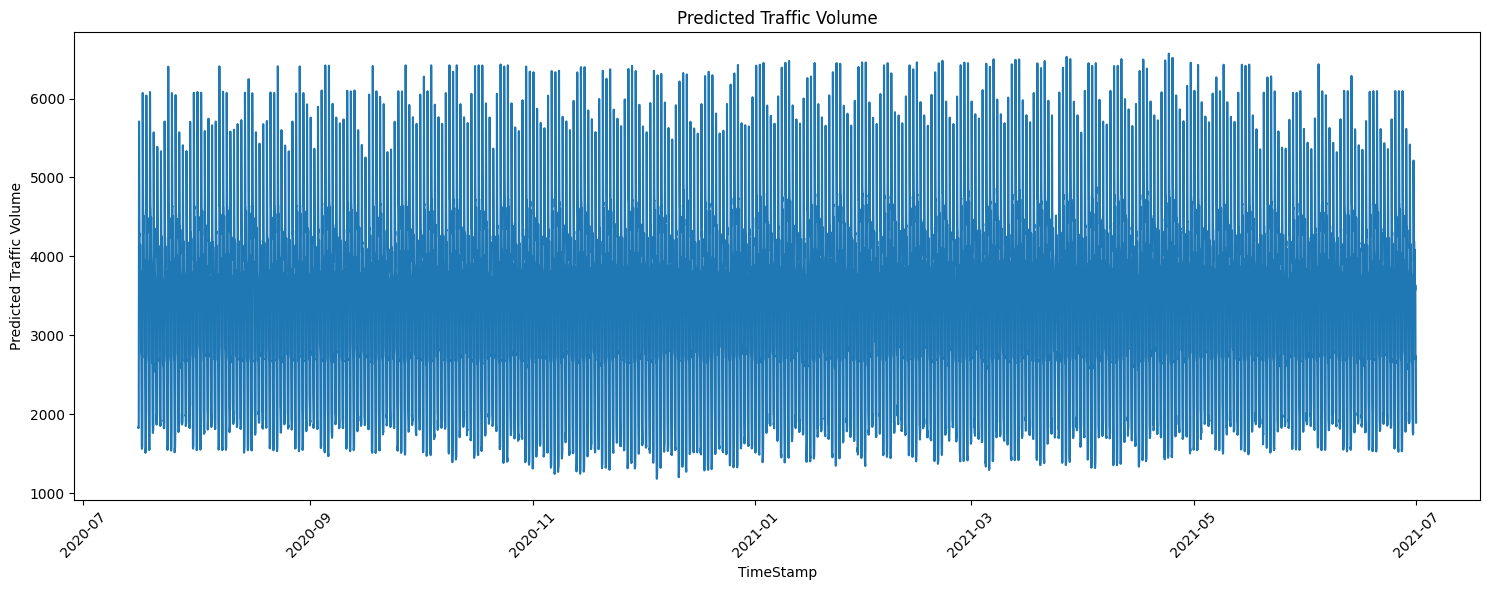


Predictions completed and saved to traffic_volume_predictions.csv
Number of predictions: 8373
Prediction period: 2020-07-16 01:00:00 to 2021-06-30 23:00:00


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from datetime import datetime, timedelta

class TrafficVolumeForecast:
    def __init__(self, train_data_path, test_data_path):
        # Load the training data
        self.train_df = pd.read_csv(train_data_path)
        
        # Load the test data
        self.test_df = pd.read_csv(test_data_path)
        
        # Convert TimeStamp to datetime with dayfirst=True for both datasets
        self.train_df['TimeStamp'] = pd.to_datetime(self.train_df['TimeStamp'], dayfirst=True)
        self.test_df['TimeStamp'] = pd.to_datetime(self.test_df['TimeStamp'], dayfirst=True)
        
        # Normalize categorical variables to handle case/whitespace inconsistencies
        self._normalize_categorical_variables()
        
        # Feature Engineering for training data
        self._engineer_time_features(self.train_df)
        
        # Encode categorical variables for training data
        self._encode_categorical_variables(self.train_df)
    
    def _normalize_categorical_variables(self):
        """Normalize weather categories to handle case/whitespace inconsistencies"""
        # Normalize strings by stripping whitespace and standardizing case
        for df in [self.train_df, self.test_df]:
            if 'Weather' in df.columns:
                df['Weather'] = df['Weather'].str.strip()
            if 'Weather_Desc' in df.columns:
                df['Weather_Desc'] = df['Weather_Desc'].str.strip()
    
    def _engineer_time_features(self, df):
        """Extract time-based features from timestamp"""
        # Extract time-based features
        df['Hour'] = df['TimeStamp'].dt.hour
        df['Day_of_Week'] = df['TimeStamp'].dt.dayofweek
        df['Month'] = df['TimeStamp'].dt.month
        df['Is_Weekend'] = df['TimeStamp'].dt.dayofweek.isin([5,6]).astype(int)
        
        # If 'Traffic_Vol' exists in the dataframe
        if 'Traffic_Vol' in df.columns:
            # Check if we have enough data for lag features
            data_length = len(df)
            
            # Lag features for traffic volume
            df['Traffic_Volume_Lag1'] = df['Traffic_Vol'].shift(1)
            
            # Only create lag-24 if we have enough data
            if data_length >= 24:
                df['Traffic_Volume_Lag24'] = df['Traffic_Vol'].shift(24)
            else:
                # Use a smaller lag as fallback
                print(f"Warning: Not enough data for 24-hour lag (only {data_length} records). Using lag-1 as substitute.")
                df['Traffic_Volume_Lag24'] = df['Traffic_Vol'].shift(1)
            
            # Rolling window features - adjust window size based on available data
            window_size_6 = min(6, data_length)
            window_size_24 = min(24, data_length)
            
            df['Traffic_Volume_Rolling_Mean_6'] = df['Traffic_Vol'].rolling(window=window_size_6).mean()
            df['Traffic_Volume_Rolling_Mean_24'] = df['Traffic_Vol'].rolling(window=window_size_24).mean()
            
            # Drop NaN values created by lag and rolling features
            df.dropna(inplace=True)
    
    def _encode_categorical_variables(self, df):
        """Encode categorical variables using LabelEncoder"""
        # Label Encoding for categorical variables
        self.le_weather = LabelEncoder()
        self.le_weather_desc = LabelEncoder()
        
        # Print unique weather categories for debugging
        print("Weather categories in training data:", df['Weather'].unique())
        print("Number of unique weather categories:", len(df['Weather'].unique()))
        print("Weather descriptions in training data:", df['Weather_Desc'].unique())
        print("Number of unique weather descriptions:", len(df['Weather_Desc'].unique()))
        
        df['Weather_Encoded'] = self.le_weather.fit_transform(df['Weather'])
        df['Weather_Desc_Encoded'] = self.le_weather_desc.fit_transform(df['Weather_Desc'])
    
    def prepare_train_features_and_target(self):
        """Prepare features and target for model training"""
        # Select features
        features = [
            'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover', 
            'Weather_Encoded', 'Weather_Desc_Encoded', 
            'Hour', 'Day_of_Week', 'Month', 'Is_Weekend'
        ]
        
        # Add lag and rolling features if they exist
        if all(col in self.train_df.columns for col in 
               ['Traffic_Volume_Lag1', 'Traffic_Volume_Lag24', 
                'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24']):
            features.extend([
                'Traffic_Volume_Lag1', 'Traffic_Volume_Lag24',
                'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24'
            ])
        
        X = self.train_df[features]
        y = self.train_df['Traffic_Vol']
        
        return train_test_split(X, y, test_size=0.2, shuffle=False)
    
    def prepare_test_features(self):
        """Prepare features for the test dataset"""
        # Select features for test data
        features = [
            'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover', 
            'Weather_Encoded', 'Weather_Desc_Encoded', 
            'Hour', 'Day_of_Week', 'Month', 'Is_Weekend'
        ]
        
        # Handle unseen weather categories in test data
        unseen_weather = []
        for weather in self.test_df['Weather'].unique():
            if weather not in self.le_weather.classes_:
                unseen_weather.append(weather)
                print(f"Warning: Unseen weather category '{weather}' found in test data")
        
        if unseen_weather:
            print(f"Total unseen weather categories: {len(unseen_weather)}")
        
        # Replace unseen weather categories with the most common category from training
        most_common_weather = self.train_df['Weather'].mode()[0]
        self.test_df['Weather'] = self.test_df['Weather'].apply(
            lambda x: x if x in self.le_weather.classes_ else most_common_weather
        )
        
        # Handle unseen weather descriptions
        unseen_desc = []
        for desc in self.test_df['Weather_Desc'].unique():
            if desc not in self.le_weather_desc.classes_:
                unseen_desc.append(desc)
                print(f"Warning: Unseen weather description '{desc}' found in test data")
        
        if unseen_desc:
            print(f"Total unseen weather descriptions: {len(unseen_desc)}")
        
        # Replace unseen weather descriptions with the most common description from training
        most_common_desc = self.train_df['Weather_Desc'].mode()[0]
        self.test_df['Weather_Desc'] = self.test_df['Weather_Desc'].apply(
            lambda x: x if x in self.le_weather_desc.classes_ else most_common_desc
        )
        
        # Now encode the categorical variables
        self.test_df['Weather_Encoded'] = self.le_weather.transform(self.test_df['Weather'])
        self.test_df['Weather_Desc_Encoded'] = self.le_weather_desc.transform(self.test_df['Weather_Desc'])
        
        # Add time-based features to test data
        self.test_df['Hour'] = self.test_df['TimeStamp'].dt.hour
        self.test_df['Day_of_Week'] = self.test_df['TimeStamp'].dt.dayofweek
        self.test_df['Month'] = self.test_df['TimeStamp'].dt.month
        self.test_df['Is_Weekend'] = self.test_df['TimeStamp'].dt.dayofweek.isin([5,6]).astype(int)
        
        # Safely get training data for lag features
        data_length = len(self.train_df)
        
        # Use last known traffic volume for initial lag features
        last_traffic_volume = self.train_df['Traffic_Vol'].iloc[-1]
        
        # Safely handle lag-24 data
        if data_length >= 24:
            last_24h_traffic_volume = self.train_df['Traffic_Vol'].iloc[-24]
        else:
            # If we don't have 24 hours of data, use the earliest available
            last_24h_traffic_volume = self.train_df['Traffic_Vol'].iloc[0]
            print("Warning: Not enough historical data for 24-hour lag. Using earliest available data point.")
        
        # Set lag features for test data
        self.test_df['Traffic_Volume_Lag1'] = last_traffic_volume
        self.test_df['Traffic_Volume_Lag24'] = last_24h_traffic_volume
        
        # Safely calculate rolling means
        rolling_window_6 = min(6, data_length)
        rolling_window_24 = min(24, data_length)
        
        self.test_df['Traffic_Volume_Rolling_Mean_6'] = self.train_df['Traffic_Vol'].tail(rolling_window_6).mean()
        self.test_df['Traffic_Volume_Rolling_Mean_24'] = self.train_df['Traffic_Vol'].tail(rolling_window_24).mean()
        
        # Include these features
        features.extend([
            'Traffic_Volume_Lag1', 'Traffic_Volume_Lag24',
            'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24'
        ])
        
        return self.test_df[features]
    
    def train_model(self):
        """Train the XGBoost model"""
        # Prepare training data
        X_train, X_test, y_train, y_test = self.prepare_train_features_and_target()
        
        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # XGBoost Model
        model = xgb.XGBRegressor(
            n_estimators=100, 
            learning_rate=0.1,
            max_depth=6,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        
        model.fit(X_train_scaled, y_train)
        
        # Evaluation on test set
        y_pred = model.predict(X_test_scaled)
        mae = np.mean(np.abs(y_test - y_pred))
        rmse = np.sqrt(np.mean((y_test - y_pred)**2))
        
        print("Model Training Performance:")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        
        # Feature importance
        feature_importance = sorted(zip(X_train.columns, model.feature_importances_), 
                                   key=lambda x: x[1], reverse=True)
        print("\nFeature Importance:")
        for feature, importance in feature_importance:
            print(f"{feature}: {importance:.4f}")
        
        return model, scaler
    
    def predict_test_data(self, model, scaler):
        """Generate predictions for the test dataset"""
        # Prepare test features
        X_test = self.prepare_test_features()
        
        # Scale features
        X_test_scaled = scaler.transform(X_test)
        
        # Predict
        test_predictions = model.predict(X_test_scaled)
        
        # Create results DataFrame
        results_df = self.test_df.copy()
        results_df['Predicted_Traffic_Vol'] = test_predictions
        
        return results_df

def main():
    # Paths to your datasets
    train_data_path = 'Train_df_18-20.csv'
    test_data_path = 'Test_df - Test_df.csv'  # Your test data file
    
    print("Starting Traffic Volume Forecasting...")
    
    # Initialize the forecast model
    forecast_model = TrafficVolumeForecast(train_data_path, test_data_path)
    
    # Train the model
    print("\nTraining the model...")
    model, scaler = forecast_model.train_model()
    
    # Predict on test dataset
    print("\nGenerating predictions for test data...")
    test_predictions = forecast_model.predict_test_data(model, scaler)
    
    # Visualize predictions
    plt.figure(figsize=(15,6))
    plt.plot(test_predictions['TimeStamp'], test_predictions['Predicted_Traffic_Vol'])
    plt.title('Predicted Traffic Volume')
    plt.xlabel('TimeStamp')
    plt.ylabel('Predicted Traffic Volume')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Save predictions
    output_file = 'traffic_volume_predictions.csv'
    test_predictions.to_csv(output_file, index=False)
    
    print(f"\nPredictions completed and saved to {output_file}")
    print(f"Number of predictions: {len(test_predictions)}")
    print(f"Prediction period: {test_predictions['TimeStamp'].min()} to {test_predictions['TimeStamp'].max()}")

if __name__ == "__main__":
    main()

Starting Traffic Volume Forecasting...

Training the model...
Model Training Performance:
Mean Absolute Error: 225.58
Root Mean Squared Error: 339.50

Generating predictions for test data...
Total unseen weather descriptions: 1


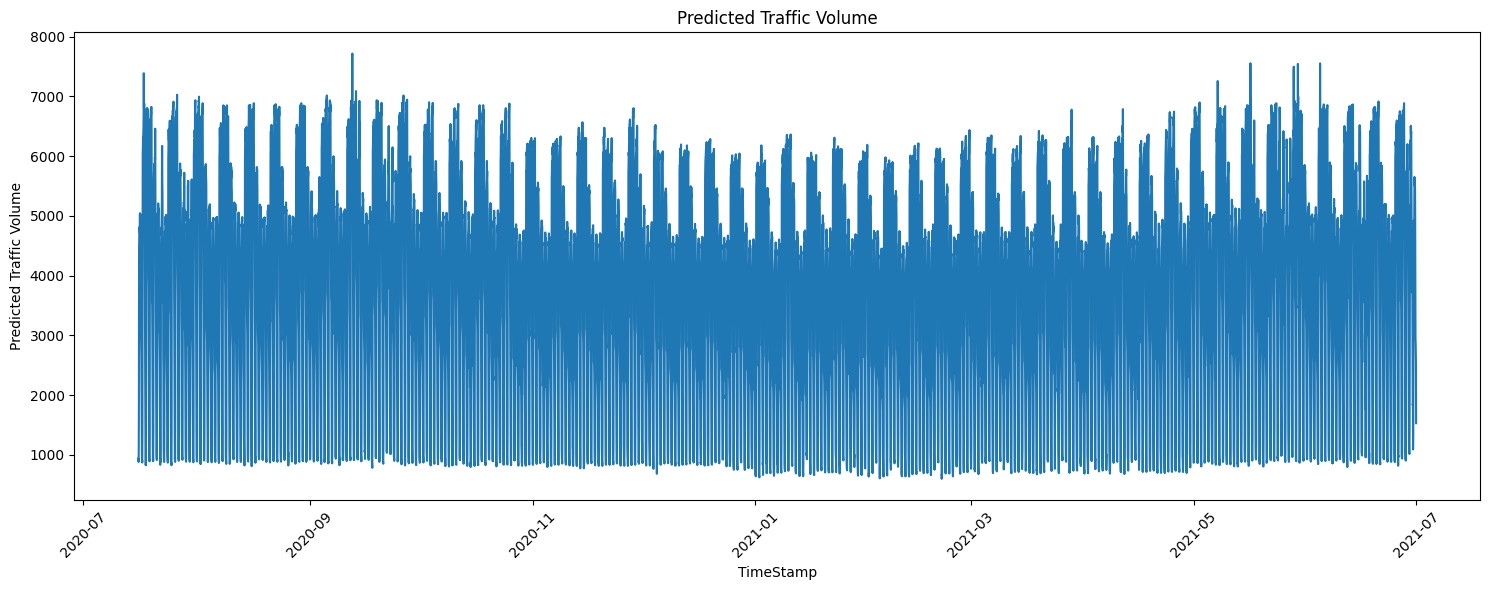


Predictions completed and saved to traffic_volume_predictions_combined.csv
Number of predictions: 8373
Prediction period: 2020-07-16 01:00:00 to 2021-06-30 23:00:00


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from datetime import datetime, timedelta

class TrafficVolumeForecast:
    def __init__(self, train_data_path_1, train_data_path_2, test_data_path):
        # Load the two training datasets
        self.train_df_1 = pd.read_csv(train_data_path_1)
        self.train_df_2 = pd.read_csv(train_data_path_2)
        
        # Load the test dataset
        self.test_df = pd.read_csv(test_data_path)
        
        # Convert TimeStamp to datetime with dayfirst=True for both datasets
        self.train_df_1['TimeStamp'] = pd.to_datetime(self.train_df_1['TimeStamp'], dayfirst=True)
        self.train_df_2['TimeStamp'] = pd.to_datetime(self.train_df_2['TimeStamp'], dayfirst=True)
        self.test_df['TimeStamp'] = pd.to_datetime(self.test_df['TimeStamp'], dayfirst=True)
        
        # Normalize categorical variables to handle case/whitespace inconsistencies
        self._normalize_categorical_variables()
        
        # Feature Engineering for training data
        self._engineer_time_features(self.train_df_1)
        self._engineer_time_features(self.train_df_2)
        
        # Encode categorical variables for both training datasets
        self._encode_categorical_variables(self.train_df_1)
        self._encode_categorical_variables(self.train_df_2)
    
    def _normalize_categorical_variables(self):
        """Normalize weather categories to handle case/whitespace inconsistencies"""
        # Normalize strings by stripping whitespace and standardizing case
        for df in [self.train_df_1, self.train_df_2, self.test_df]:
            if 'Weather' in df.columns:
                df['Weather'] = df['Weather'].str.strip()
            if 'Weather_Desc' in df.columns:
                df['Weather_Desc'] = df['Weather_Desc'].str.strip()
    
    def _engineer_time_features(self, df):
        """Extract time-based features from timestamp"""
        # Extract time-based features
        df['Hour'] = df['TimeStamp'].dt.hour
        df['Day_of_Week'] = df['TimeStamp'].dt.dayofweek
        df['Month'] = df['TimeStamp'].dt.month
        df['Is_Weekend'] = df['TimeStamp'].dt.dayofweek.isin([5, 6]).astype(int)
        
        # If 'Traffic_Vol' exists in the dataframe
        if 'Traffic_Vol' in df.columns:
            # Check if we have enough data for lag features
            data_length = len(df)
            
            # Lag features for traffic volume
            df['Traffic_Volume_Lag1'] = df['Traffic_Vol'].shift(1)
            
            # Only create lag-24 if we have enough data
            if data_length >= 24:
                df['Traffic_Volume_Lag24'] = df['Traffic_Vol'].shift(24)
            else:
                # Use a smaller lag as fallback
                print(f"Warning: Not enough data for 24-hour lag (only {data_length} records). Using lag-1 as substitute.")
                df['Traffic_Volume_Lag24'] = df['Traffic_Vol'].shift(1)
            
            # Rolling window features - adjust window size based on available data
            window_size_6 = min(6, data_length)
            window_size_24 = min(24, data_length)
            
            df['Traffic_Volume_Rolling_Mean_6'] = df['Traffic_Vol'].rolling(window=window_size_6).mean()
            df['Traffic_Volume_Rolling_Mean_24'] = df['Traffic_Vol'].rolling(window=window_size_24).mean()
            
            # Drop NaN values created by lag and rolling features
            df.dropna(inplace=True)
    
    def _encode_categorical_variables(self, df):
        """Encode categorical variables using LabelEncoder"""
        # Label Encoding for categorical variables
        self.le_weather = LabelEncoder()
        self.le_weather_desc = LabelEncoder()
        
        # Encode weather variables
        df['Weather_Encoded'] = self.le_weather.fit_transform(df['Weather'])
        df['Weather_Desc_Encoded'] = self.le_weather_desc.fit_transform(df['Weather_Desc'])
    
    def prepare_combined_train_data(self):
        """Combine both training datasets and prepare for model training"""
        # Combine both training dataframes
        combined_train_df = pd.concat([self.train_df_1, self.train_df_2], axis=0)
        
        # Select features
        features = [
            'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover', 
            'Weather_Encoded', 'Weather_Desc_Encoded', 
            'Hour', 'Day_of_Week', 'Month', 'Is_Weekend'
        ]
        
        # Add lag and rolling features if they exist
        if all(col in combined_train_df.columns for col in 
               ['Traffic_Volume_Lag1', 'Traffic_Volume_Lag24', 
                'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24']):
            features.extend([
                'Traffic_Volume_Lag1', 'Traffic_Volume_Lag24',
                'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24'
            ])
        
        X = combined_train_df[features]
        y = combined_train_df['Traffic_Vol']
        
        return train_test_split(X, y, test_size=0.2, shuffle=False)
    
    def prepare_test_features(self):
        """Prepare features for the test dataset"""
        features = [
            'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover', 
            'Weather_Encoded', 'Weather_Desc_Encoded', 
            'Hour', 'Day_of_Week', 'Month', 'Is_Weekend'
        ]
        
        # Handle unseen weather categories in test data
        unseen_weather = []
        for weather in self.test_df['Weather'].unique():
            if weather not in self.le_weather.classes_:
                unseen_weather.append(weather)
                print(f"Warning: Unseen weather category '{weather}' found in test data")
        
        if unseen_weather:
            print(f"Total unseen weather categories: {len(unseen_weather)}")
        
        # Replace unseen weather categories with the most common category from training
        most_common_weather = self.train_df_1['Weather'].mode()[0]
        self.test_df['Weather'] = self.test_df['Weather'].apply(
            lambda x: x if x in self.le_weather.classes_ else most_common_weather
        )
        
        # Handle unseen weather descriptions
        unseen_desc = []
        for desc in self.test_df['Weather_Desc'].unique():
            if desc not in self.le_weather_desc.classes_:
                unseen_desc.append(desc)
                print(f"Warning: Unseen weather description '{desc}' found in test data")
        
        if unseen_desc:
            print(f"Total unseen weather descriptions: {len(unseen_desc)}")
        
        # Replace unseen weather descriptions with the most common description from training
        most_common_desc = self.train_df_1['Weather_Desc'].mode()[0]
        self.test_df['Weather_Desc'] = self.test_df['Weather_Desc'].apply(
            lambda x: x if x in self.le_weather_desc.classes_ else most_common_desc
        )
        
        # Now encode the categorical variables
        self.test_df['Weather_Encoded'] = self.le_weather.transform(self.test_df['Weather'])
        self.test_df['Weather_Desc_Encoded'] = self.le_weather_desc.transform(self.test_df['Weather_Desc'])
        
        # Add time-based features to test data
        self.test_df['Hour'] = self.test_df['TimeStamp'].dt.hour
        self.test_df['Day_of_Week'] = self.test_df['TimeStamp'].dt.dayofweek
        self.test_df['Month'] = self.test_df['TimeStamp'].dt.month
        self.test_df['Is_Weekend'] = self.test_df['TimeStamp'].dt.dayofweek.isin([5, 6]).astype(int)
        
        # Set lag features for test data
        self.test_df['Traffic_Volume_Lag1'] = self.train_df_1['Traffic_Vol'].iloc[-1]
        self.test_df['Traffic_Volume_Lag24'] = self.train_df_1['Traffic_Vol'].iloc[0]
        
        # Safely calculate rolling means
        self.test_df['Traffic_Volume_Rolling_Mean_6'] = self.train_df_1['Traffic_Vol'].tail(6).mean()
        self.test_df['Traffic_Volume_Rolling_Mean_24'] = self.train_df_1['Traffic_Vol'].tail(24).mean()
        
        features.extend([
            'Traffic_Volume_Lag1', 'Traffic_Volume_Lag24',
            'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24'
        ])
        
        return self.test_df[features]
    
    def train_model(self):
        """Train the XGBoost model"""
        # Prepare combined training data
        X_train, X_test, y_train, y_test = self.prepare_combined_train_data()
        
        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # XGBoost Model
        model = xgb.XGBRegressor(
            n_estimators=100, 
            learning_rate=0.1,
            max_depth=6,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        
        model.fit(X_train_scaled, y_train)
        
        # Evaluation on test set
        y_pred = model.predict(X_test_scaled)
        mae = np.mean(np.abs(y_test - y_pred))
        rmse = np.sqrt(np.mean((y_test - y_pred)**2))
        
        print("Model Training Performance:")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        
        return model, scaler
    
    def predict_test_data(self, model, scaler):
        """Generate predictions for the test dataset"""
        # Prepare test features
        X_test = self.prepare_test_features()
        
        # Scale features
        X_test_scaled = scaler.transform(X_test)
        
        # Predict
        test_predictions = model.predict(X_test_scaled)
        
        # Create results DataFrame
        results_df = self.test_df.copy()
        results_df['Predicted_Traffic_Vol'] = test_predictions
        
        return results_df

def main():
    # Paths to your datasets
    train_data_path_1 = 'Train_df_15-17.csv'  # 2015-2017 data
    train_data_path_2 = 'Train_df_18-20.csv'  # 2018-2020 data
    test_data_path = 'Test_df - Test_df.csv'  # Your test data file
    
    print("Starting Traffic Volume Forecasting...")
    
    # Initialize the forecast model
    forecast_model = TrafficVolumeForecast(train_data_path_1, train_data_path_2, test_data_path)
    
    # Train the model
    print("\nTraining the model...")
    model, scaler = forecast_model.train_model()
    
    # Predict on test dataset
    print("\nGenerating predictions for test data...")
    test_predictions = forecast_model.predict_test_data(model, scaler)
    
    # Visualize predictions
    plt.figure(figsize=(15, 6))
    plt.plot(test_predictions['TimeStamp'], test_predictions['Predicted_Traffic_Vol'])
    plt.title('Predicted Traffic Volume')
    plt.xlabel('TimeStamp')
    plt.ylabel('Predicted Traffic Volume')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Save predictions
    output_file = 'traffic_volume_predictions_combined.csv'
    test_predictions.to_csv(output_file, index=False)
    
    print(f"\nPredictions completed and saved to {output_file}")
    print(f"Number of predictions: {len(test_predictions)}")
    print(f"Prediction period: {test_predictions['TimeStamp'].min()} to {test_predictions['TimeStamp'].max()}")

if __name__ == "__main__":
    main()

d:\BDA_Sem_2\Placements\Astrikos_MTech_2026\Challenge\DS\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-26 18:30:25,718] A new study created in memory with name: no-name-0c543396-09e5-430b-963d-c977b68d6274
C:\Users\MSIS\AppData\Local\Temp\ipykernel_6700\452714195.py:97: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\MSIS\AppData\Local\Temp\ipykernel_6700\452714195.py:99: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsampl

Model Performance:
MAE: 202.39
RMSE: 314.46


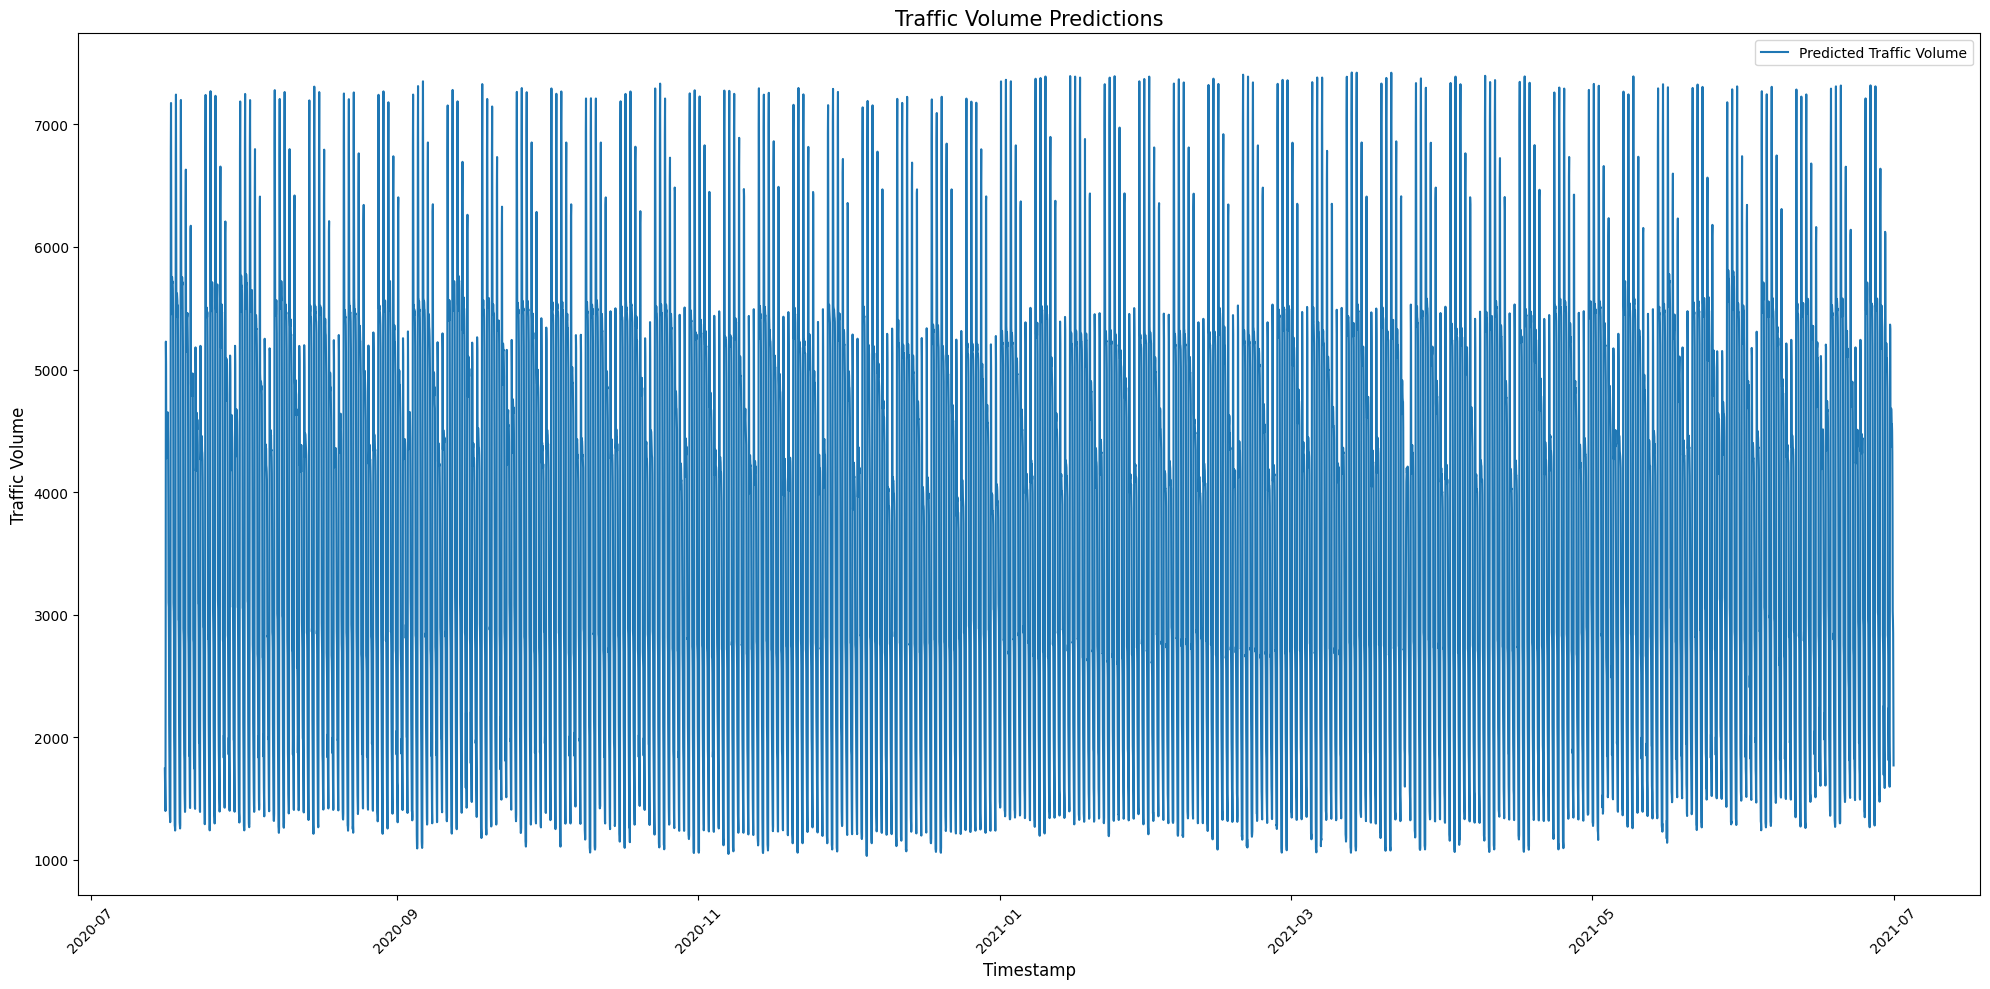

Predictions saved successfully. Total rows: 8373


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import optuna
from concurrent.futures import ProcessPoolExecutor

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import mutual_info_regression

class AdvancedTrafficVolumeForecast:
    def __init__(self, train_data_paths, test_data_path):
        # Data Loading
        self.train_dfs = [pd.read_csv(path) for path in train_data_paths]
        self.test_df = pd.read_csv(test_data_path)
        
        # Preprocessing Initialization
        self._preprocess_data()
        
    def _preprocess_data(self):
        """Comprehensive data preprocessing"""
        def process_dataframe(df):
            # Convert timestamp
            df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], dayfirst=True)
            
            # Normalize categorical variables
            categorical_cols = ['Weather', 'Weather_Desc']
            for col in categorical_cols:
                df[col] = df[col].str.strip().str.lower()
            
            return df
        
        # Process train and test dataframes
        self.train_dfs = [process_dataframe(df) for df in self.train_dfs]
        self.test_df = process_dataframe(self.test_df)
        
        # Feature Engineering
        def engineer_features(df):
            # Time-based features
            df['Hour'] = df['TimeStamp'].dt.hour
            df['Day_of_Week'] = df['TimeStamp'].dt.dayofweek
            df['Month'] = df['TimeStamp'].dt.month
            df['Is_Weekend'] = df['TimeStamp'].dt.dayofweek.isin([5, 6]).astype(int)
            
            # Advanced time features
            df['Season'] = np.select(
                [df['Month'].between(3, 5), 
                 df['Month'].between(6, 8), 
                 df['Month'].between(9, 11)],
                ['Spring', 'Summer', 'Autumn'], 
                default='Winter'
            )
            
            # Lag and Rolling Features
            if 'Traffic_Vol' in df.columns:
                df['Traffic_Volume_Lag1'] = df['Traffic_Vol'].shift(1)
                df['Traffic_Volume_Lag24'] = df['Traffic_Vol'].shift(24)
                df['Traffic_Volume_Rolling_Mean_6'] = df['Traffic_Vol'].rolling(6).mean()
                df['Traffic_Volume_Rolling_Mean_24'] = df['Traffic_Vol'].rolling(24).mean()
                df.dropna(inplace=True)  # Remove NaN values created by shifts and rolling windows
            
            return df
        
        # Apply feature engineering
        self.train_dfs = [engineer_features(df) for df in self.train_dfs]
        self.test_df = engineer_features(self.test_df)
    
    def _parallel_feature_importance(self, X, y):
        """Compute feature importance in parallel"""
        def compute_importance(estimator):
            estimator.fit(X, y)
            return estimator.feature_importances_
        
        # Parallel feature importance computation
        rf = RandomForestRegressor(n_estimators=100)
        gb = GradientBoostingRegressor(n_estimators=100)
        
        with ProcessPoolExecutor() as executor:
            future_rf = executor.submit(compute_importance, rf)
            future_gb = executor.submit(compute_importance, gb)
            
            rf_importance = future_rf.result()
            gb_importance = future_gb.result()
        
        return (rf_importance + gb_importance) / 2
    
    def _optuna_hyperparameter_tuning(self, X, y):
        """Advanced hyperparameter tuning with Optuna"""
        def objective(trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
                'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0)
            }
            
            model = xgb.XGBRegressor(**params, random_state=42)
            score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
            return -score.mean()
        
        # Create a study object and optimize the objective function
        study = optuna.create_study(direction='minimize')
        study.optimize(objective, n_trials=100)
        
        return study.best_params
    
    def train_model(self):
        """Comprehensive model training with parallel processing"""
        # Combine training datasets
        combined_train_df = pd.concat(self.train_dfs)
        
        # Store the last values for test data preparation
        self.last_traffic_volume = combined_train_df['Traffic_Vol'].iloc[-1]
        self.last_24h_traffic_volume = combined_train_df['Traffic_Vol'].iloc[-24] if len(combined_train_df) >= 24 else combined_train_df['Traffic_Vol'].iloc[0]
        self.rolling_mean_6 = combined_train_df['Traffic_Vol'].tail(6).mean()
        self.rolling_mean_24 = combined_train_df['Traffic_Vol'].tail(24).mean()
        
        # Prepare features and target
        features = [
            'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 
            'Cloud_Cover', 'Hour', 'Day_of_Week', 'Month', 'Is_Weekend',
            'Traffic_Volume_Lag1', 'Traffic_Volume_Lag24',
            'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24'
        ]
        
        X = combined_train_df[features]
        y = combined_train_df['Traffic_Vol']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Hyperparameter Tuning
        best_params = self._optuna_hyperparameter_tuning(X_train_scaled, y_train)
        
        # Train XGBoost with best params
        model = xgb.XGBRegressor(**best_params, random_state=42)
        model.fit(X_train_scaled, y_train)
        
        # Predictions and Evaluation
        y_pred = model.predict(X_test_scaled)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print(f"Model Performance:")
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        
        return model, scaler
    
    def predict(self, model, scaler):
        """Generate predictions for test data"""
        # Add lag and rolling features to test data
        self.test_df['Traffic_Volume_Lag1'] = self.last_traffic_volume
        self.test_df['Traffic_Volume_Lag24'] = self.last_24h_traffic_volume
        self.test_df['Traffic_Volume_Rolling_Mean_6'] = self.rolling_mean_6
        self.test_df['Traffic_Volume_Rolling_Mean_24'] = self.rolling_mean_24
        
        # Prepare test features
        features = [
            'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 
            'Cloud_Cover', 'Hour', 'Day_of_Week', 'Month', 'Is_Weekend',
            'Traffic_Volume_Lag1', 'Traffic_Volume_Lag24',
            'Traffic_Volume_Rolling_Mean_6', 'Traffic_Volume_Rolling_Mean_24'
        ]
        
        X_test = self.test_df[features]
        X_test_scaled = scaler.transform(X_test)
        
        # Predict
        predictions = model.predict(X_test_scaled)
        
        # Create results DataFrame
        results_df = self.test_df.copy()
        results_df['Predicted_Traffic_Vol'] = predictions
        
        return results_df
    
    def visualize_predictions(self, results_df):
        """Advanced visualization of predictions"""
        plt.figure(figsize=(20, 10))
        plt.plot(results_df['TimeStamp'], 
                 results_df['Predicted_Traffic_Vol'], 
                 label='Predicted Traffic Volume')
        plt.title('Traffic Volume Predictions', fontsize=15)
        plt.xlabel('Timestamp', fontsize=12)
        plt.ylabel('Traffic Volume', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

def main():
    # Data paths
    train_data_paths = ['Train_df_15-17.csv', 'Train_df_18-20.csv']
    test_data_path = 'Test_df - Test_df.csv'
    
    # Initialize and run forecast
    forecast = AdvancedTrafficVolumeForecast(train_data_paths, test_data_path)
    
    # Train model
    model, scaler = forecast.train_model()
    
    # Generate predictions
    predictions = forecast.predict(model, scaler)
    
    # Visualize
    forecast.visualize_predictions(predictions)
    
    # Save predictions
    predictions.to_csv('traffic_volume_predictions.csv', index=False)
    print(f"Predictions saved successfully. Total rows: {len(predictions)}")

if __name__ == "__main__":
    main()